In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms, datasets
from torch.utils.data import DataLoader, random_split
import os
import shutil
import zipfile
from google.colab import drive
from tqdm import tqdm


print("Google Drive bağlanıyor...")
drive.mount('/content/drive')


zip_path_drive = "/content/drive/MyDrive/archive.zip"

gecici_klasor = "/content/temp_unzipped"
hedef_klasor = "/content/dataset_final"


if os.path.exists(hedef_klasor):
    print(f" '{hedef_klasor}' zaten var. İşlemler atlanıyor...")
else:

    os.makedirs(gecici_klasor, exist_ok=True)
    os.makedirs(os.path.join(hedef_klasor, "Benign"), exist_ok=True)
    os.makedirs(os.path.join(hedef_klasor, "Malignant"), exist_ok=True)


    if os.path.exists(zip_path_drive):
        print(f" '{zip_path_drive}' bulundu. Colab hafızasına çıkarılıyor...")
        try:
            with zipfile.ZipFile(zip_path_drive, 'r') as zip_ref:
                zip_ref.extractall(gecici_klasor)
            print(" Zip'ten çıkarma tamamlandı.")
        except Exception as e:
            print(f" Zip hatası: {e}")
            raise
    else:
        raise FileNotFoundError(f" HATA: '{zip_path_drive}' bulunamadı! Dosyayı Drive ana dizinine 'archive.zip' adıyla yüklediğinden emin ol.")


    print(" Dosyalar taranıyor ve 'Benign/Malignant' klasörlerinde toplanıyor...")

    benign_count = 0
    malignant_count = 0

    for root, dirs, files in os.walk(gecici_klasor):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                source_path = os.path.join(root, file)
                path_lower = root.lower()


                if "benign" in path_lower:
                    unique_name = f"benign_{benign_count}_{file}"
                    shutil.move(source_path, os.path.join(hedef_klasor, "Benign", unique_name))
                    benign_count += 1
                elif "malignant" in path_lower:
                    unique_name = f"malignant_{malignant_count}_{file}"
                    shutil.move(source_path, os.path.join(hedef_klasor, "Malignant", unique_name))
                    malignant_count += 1


    shutil.rmtree(gecici_klasor)

    print("-" * 30)
    print(" HAZIRLIK TAMAMLANDI!")
    print(f" Toplam Benign: {benign_count}")
    print(f" Toplam Malignant: {malignant_count}")
    print(f" Veriler '{hedef_klasor}' klasöründe eğitime hazır.")

Google Drive bağlanıyor...
Mounted at /content/drive
 '/content/drive/MyDrive/archive.zip' bulundu. Colab hafızasına çıkarılıyor...
 Zip'ten çıkarma tamamlandı.
 Dosyalar taranıyor ve 'Benign/Malignant' klasörlerinde toplanıyor...
------------------------------
 HAZIRLIK TAMAMLANDI!
 Toplam Benign: 2480
 Toplam Malignant: 5429
 Veriler '/content/dataset_final' klasöründe eğitime hazır.


 Kullanılan Cihaz: cuda
 Veri seti yükleniyor...
 Sınıflar: ['Benign', 'Malignant']
 Veri Dağılımı -> Train: 5931, Val: 1186, Test: 792
 Model inşa ediliyor (MobileNetV3 Large)...
Downloading: "https://download.pytorch.org/models/mobilenet_v3_large-8738ca79.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v3_large-8738ca79.pth


100%|██████████| 21.1M/21.1M [00:00<00:00, 200MB/s]


 Dondurulan parametre grubu sayısı: 150
Model ve Optimizer başarıyla düzeltildi.

 Eğitim Başlıyor... (13 Epoch)
Epoch [1/13] LR: 0.00095 | Train Loss: 0.3253 Acc: 85.35% | Val Loss: 0.2796 Acc: 88.11%
Epoch [2/13] LR: 0.00090 | Train Loss: 0.1625 Acc: 93.49% | Val Loss: 0.1682 Acc: 93.09%
Epoch [3/13] LR: 0.00086 | Train Loss: 0.1096 Acc: 96.21% | Val Loss: 0.1179 Acc: 94.94%
Epoch [4/13] LR: 0.00081 | Train Loss: 0.0873 Acc: 96.97% | Val Loss: 0.1527 Acc: 93.68%
Epoch [5/13] LR: 0.00077 | Train Loss: 0.0792 Acc: 97.12% | Val Loss: 0.0962 Acc: 96.80%
Epoch [6/13] LR: 0.00074 | Train Loss: 0.0549 Acc: 97.91% | Val Loss: 0.1150 Acc: 95.78%
Epoch [7/13] LR: 0.00070 | Train Loss: 0.0543 Acc: 97.93% | Val Loss: 0.1123 Acc: 95.95%
Epoch [8/13] LR: 0.00066 | Train Loss: 0.0361 Acc: 98.65% | Val Loss: 0.0779 Acc: 97.13%
Epoch [9/13] LR: 0.00063 | Train Loss: 0.0360 Acc: 98.68% | Val Loss: 0.0894 Acc: 97.22%
Epoch [10/13] LR: 0.00060 | Train Loss: 0.0313 Acc: 98.92% | Val Loss: 0.1101 Acc: 96.

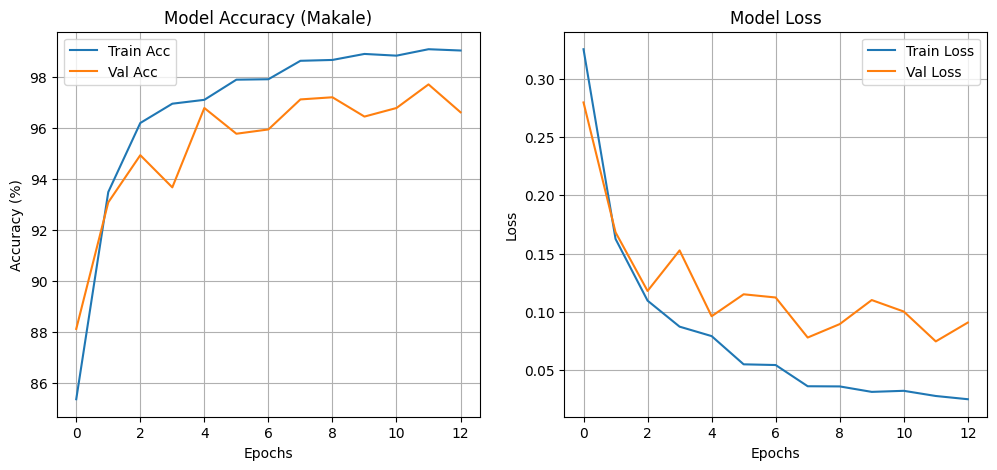


 Test Seti Değerlendirmesi:
 Final Test Accuracy: 95.45%


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms, datasets
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
import numpy as np
import time


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f" Kullanılan Cihaz: {device}")

#Veri arttırma yapıyoruz (sadece yatay çevirme) ve giriş boyutu ayarlıyoruz.

data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}


print(" Veri seti yükleniyor...")
data_dir = '/content/dataset_final'

full_dataset = datasets.ImageFolder(root=data_dir, transform=data_transforms['train'])
class_names = full_dataset.classes
print(f" Sınıflar: {class_names}")

# datasetimizi test,doğrulama ve eğtim için ayırıyoruz (%75 Train, %15 Val, %10 Test )
train_size = int(0.75 * len(full_dataset))
val_size = int(0.15 * len(full_dataset))
test_size = len(full_dataset) - train_size - val_size

print(f" Veri Dağılımı -> Train: {train_size}, Val: {val_size}, Test: {test_size}")

train_dataset, val_dataset, test_dataset = random_split(full_dataset, [train_size, val_size, test_size])



# Dataloader tanımlıyoruz verileri rama bachler halinde alıyoruz.
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2)



def build_paper_model():
    print(" Model inşa ediliyor (MobileNetV3 Large)...")
    # MobileNetV3 kullanıyoruz
    model = models.mobilenet_v3_large(weights=models.MobileNet_V3_Large_Weights.IMAGENET1K_V1)

    # Makaleye göre katman dondumra işlemi yapıyoruz ilk 150 katman donduruluyor
    parameter_counter = 0
    frozen_count = 0
    for param in model.features.parameters():
        if parameter_counter < 150:
            param.requires_grad = False
            frozen_count += 1
        parameter_counter += 1
    print(f" Dondurulan parametre grubu sayısı: {frozen_count}")



    # yeni sııflandırcı katmanları
    model.classifier = nn.Sequential(
        nn.Dropout(p=0.2),
        nn.Linear(960, 64),
        nn.ReLU(),
        nn.BatchNorm1d(64),
        nn.Linear(64, 32),
        nn.ReLU(),
        nn.Linear(32, 16),
        nn.ReLU(),
        nn.Linear(16, 2)
    )
    return model


model = build_paper_model().to(device)


optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.001)
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.95)

print("Model ve Optimizer başarıyla düzeltildi.")


criterion = nn.CrossEntropyLoss()


optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.001)

# her epoch başında öğrenme oranını 0.95 ile çarparak azaltıyoruz
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.95)

num_epochs = 13

train_acc_history = []
val_acc_history = []
train_loss_history = []
val_loss_history = []

print(f"\n Eğitim Başlıyor... ({num_epochs} Epoch)")
start_time = time.time()

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    # mdoel eğitimi
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader)
    epoch_acc = 100 * correct / total
    train_acc_history.append(epoch_acc)
    train_loss_history.append(epoch_loss)

    # veriseti üzerinde doğrulama
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    val_epoch_loss = val_loss / len(val_loader)
    val_epoch_acc = 100 * val_correct / val_total
    val_acc_history.append(val_epoch_acc)
    val_loss_history.append(val_epoch_loss)


    scheduler.step()
    current_lr = scheduler.get_last_lr()[0]

    print(f"Epoch [{epoch+1}/{num_epochs}] "
          f"LR: {current_lr:.5f} | "
          f"Train Loss: {epoch_loss:.4f} Acc: {epoch_acc:.2f}% | "
          f"Val Loss: {val_epoch_loss:.4f} Acc: {val_epoch_acc:.2f}%")

total_time = time.time() - start_time
print(f"\n Eğitim Tamamlandı! Toplam Süre: {total_time/60:.2f} dakika")


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_acc_history, label='Train Acc')
plt.plot(val_acc_history, label='Val Acc')
plt.title('Model Accuracy (Makale)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(train_loss_history, label='Train Loss')
plt.plot(val_loss_history, label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


print("\n Test Seti Değerlendirmesi:")
model.eval()
test_correct = 0
test_total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()

print(f" Final Test Accuracy: {100 * test_correct / test_total:.2f}%")

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms, datasets
from torch.utils.data import DataLoader, Subset
import numpy as np
import copy
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f" FİNAL AŞAMASI (Standalone) - Cihaz: {device}")


data_dir = '/content/dataset_final'

# makaleden farklı olarak dikey çevirme , derece dönüşümü ve renk değişimi var
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),      # Yatay çevirme
    transforms.RandomVerticalFlip(p=0.5),        # Dikey çevirme
    transforms.RandomRotation(15),               # 15 derece döndürme
    transforms.ColorJitter(brightness=0.1, contrast=0.1), # Renk değişimi
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])


val_test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])


print(" Veri setleri hazırlanıyor...")


full_dataset_train = datasets.ImageFolder(root=data_dir, transform=train_transforms)
full_dataset_clean = datasets.ImageFolder(root=data_dir, transform=val_test_transforms)


targets = full_dataset_clean.targets
train_idx, temp_idx = train_test_split(np.arange(len(targets)), test_size=0.25, shuffle=True, stratify=targets)
val_idx, test_idx = train_test_split(temp_idx, test_size=0.4, shuffle=True, stratify=np.array(targets)[temp_idx])



train_dataset = Subset(full_dataset_train, train_idx)
val_dataset = Subset(full_dataset_clean, val_idx)
test_dataset = Subset(full_dataset_clean, test_idx)

print(f" Veri Dağılımı -> Train: {len(train_dataset)}, Val: {len(val_dataset)}, Test: {len(test_dataset)}")


train_loader_v2 = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
val_loader_v2 = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2)
test_loader_v2 = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2)

# EfficientNet-B0
def build_efficientnet_model():
    print(" EfficientNet-B0 Modeli İnşa Ediliyor...")
    model = models.efficientnet_b0(weights=models.EfficientNet_B0_Weights.IMAGENET1K_V1)

    # Tüm katmanları donduruyoruz
    for param in model.parameters():
        param.requires_grad = False

    # fine-tunning işlemi için son blokları açıyoruz
    for param in model.features[-2:].parameters():
        param.requires_grad = True

    # sınıflandırma katmanları
    in_features = model.classifier[1].in_features
    model.classifier = nn.Sequential(
        nn.Dropout(p=0.3),
        nn.Linear(in_features, 512),
        nn.ReLU(),
        nn.BatchNorm1d(512),
        nn.Dropout(p=0.4),
        nn.Linear(512, 2)
    )
    return model

model_final = build_efficientnet_model().to(device)

# farklı olarak optimizer olarak adamW kullandık.
optimizer_final = optim.AdamW(filter(lambda p: p.requires_grad, model_final.parameters()), lr=0.001, weight_decay=1e-4)
scheduler_final = optim.lr_scheduler.ReduceLROnPlateau(optimizer_final, mode='min', factor=0.1, patience=3)
criterion = nn.CrossEntropyLoss()

# 50 epoch ama early stop koyduk
num_epochs = 50
patience = 7
best_model_wts = copy.deepcopy(model_final.state_dict())
best_acc = 0.0
best_loss = float('inf')
counter = 0

history_final = {'train_acc': [], 'val_acc': [], 'train_loss': [], 'val_loss': []}

print(f"\n Eğitim Başlıyor (Max {num_epochs} Epoch)...")
start_time = time.time()

for epoch in range(num_epochs):
    # model eğitimi
    model_final.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader_v2:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer_final.zero_grad()
        outputs = model_final(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_final.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader_v2)
    epoch_acc = 100 * correct / total
    history_final['train_acc'].append(epoch_acc)
    history_final['train_loss'].append(epoch_loss)


    model_final.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for inputs, labels in val_loader_v2:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model_final(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    val_epoch_loss = val_loss / len(val_loader_v2)
    val_epoch_acc = 100 * val_correct / val_total
    history_final['val_acc'].append(val_epoch_acc)
    history_final['val_loss'].append(val_epoch_loss)

    print(f"Epoch [{epoch+1}/{num_epochs}] Train Acc: {epoch_acc:.2f}% | Val Loss: {val_epoch_loss:.4f} | Val Acc: {val_epoch_acc:.2f}%")

    scheduler_final.step(val_epoch_loss)

    # early stopping kontolü burada yapılıyor
    if val_epoch_loss < best_loss:
        best_loss = val_epoch_loss
        best_acc = val_epoch_acc
        best_model_wts = copy.deepcopy(model_final.state_dict())
        counter = 0
        print(f"     Yeni En İyi Model! (Val Loss: {val_epoch_loss:.4f})")
    else:
        counter += 1
        print(f"     İyileşme Yok. Sayaç: {counter}/{patience}")

    if counter >= patience:
        print(f"\n Early Stopping Tetiklendi!")
        break

print(f"\n Eğitim Bitti! En İyi Val Acc: {best_acc:.2f}%")
model_final.load_state_dict(best_model_wts)


print("\n TEST SETİ SONUCU:")
model_final.eval()
test_correct = 0
test_total = 0
with torch.no_grad():
    for inputs, labels in test_loader_v2:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model_final(inputs)
        _, predicted = torch.max(outputs.data, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()

final_acc = 100 * test_correct / test_total
print(f" Final Test Accuracy: {final_acc:.2f}%")

🚀 FİNAL AŞAMASI (Standalone) - Cihaz: cuda
📂 Veri setleri hazırlanıyor...
📊 Veri Dağılımı -> Train: 5931, Val: 1186, Test: 792
🏗️ EfficientNet-B0 Modeli İnşa Ediliyor...

🔥 Eğitim Başlıyor (Max 50 Epoch)...
Epoch [1/50] Train Acc: 84.32% | Val Loss: 0.2060 | Val Acc: 91.99%
    🌟 Yeni En İyi Model! (Val Loss: 0.2060)
Epoch [2/50] Train Acc: 90.64% | Val Loss: 0.1631 | Val Acc: 93.93%
    🌟 Yeni En İyi Model! (Val Loss: 0.1631)
Epoch [3/50] Train Acc: 91.96% | Val Loss: 0.1592 | Val Acc: 95.11%
    🌟 Yeni En İyi Model! (Val Loss: 0.1592)
Epoch [4/50] Train Acc: 93.42% | Val Loss: 0.1342 | Val Acc: 95.45%
    🌟 Yeni En İyi Model! (Val Loss: 0.1342)
Epoch [5/50] Train Acc: 93.36% | Val Loss: 0.1156 | Val Acc: 95.62%
    🌟 Yeni En İyi Model! (Val Loss: 0.1156)
Epoch [6/50] Train Acc: 95.19% | Val Loss: 0.1260 | Val Acc: 95.53%
    ⚠️ İyileşme Yok. Sayaç: 1/7
Epoch [7/50] Train Acc: 94.99% | Val Loss: 0.1093 | Val Acc: 95.45%
    🌟 Yeni En İyi Model! (Val Loss: 0.1093)
Epoch [8/50] Train Ac